In [2]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

In [3]:
X_test = pd.read_csv('X_test.csv')
X_train = pd.read_csv('X_train.csv')
y_test = pd.read_csv('y_test.csv')
y_train = pd.read_csv('y_train.csv')


In [4]:
y_test = y_test.values.flatten()
y_train = y_train.values.flatten()

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [7]:
y_pred = model.predict(X_test)


In [8]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.49856716263779766


In [10]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

Classification Report:
               precision    recall  f1-score   support

           1     0.7007    0.2862    0.4064     42557
           2     0.5975    0.6245    0.6107     56500
           3     0.4984    0.6295    0.5563      7121
           4     0.1635    0.8517    0.2743       526
           5     0.0889    0.7193    0.1582      1995
           6     0.2801    0.2539    0.2664      3489
           7     0.3690    0.8010    0.5052      4015

    accuracy                         0.4986    116203
   macro avg     0.3854    0.5952    0.3968    116203
weighted avg     0.6011    0.4986    0.5093    116203



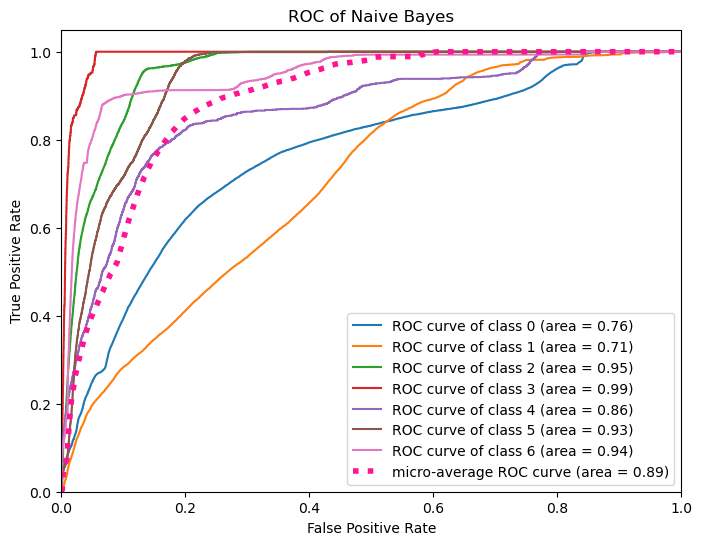

In [9]:
# Note: Use predict_proba to get the probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Binarize the output classes for the multiclass case
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Calculate probabilities for each class
y_pred_proba = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Naive Bayes')
plt.legend(loc="lower right")
plt.show()